In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import random
pd.set_option('display.max_columns', None) #allows me to see all columns in a datafram

In [2]:
wego = pd.read_csv(r'C:\da12\projects\wego-python-da12-python-spice-lattes\data\Headway Data, 8-1-2023 to 9-30-2023.csv')
wego.columns = [x.lower() for x in wego.columns]
wego.head()

,calendar_id,service_abbr,adherence_id,date,route_abbr,block_abbr,operator,trip_id,overload_id,route_direction_name,time_point_abbr,route_stop_sequence,trip_edge,latitude,longitude,scheduled_time,actual_arrival_time,actual_departure_time,adherence,scheduled_hdwy,actual_hdwy,hdwy_dev,adjusted_early_count,adjusted_late_count,adjusted_ontime_count,stop_cancelled,prev_sched_stop_cancelled,is_relief,dwell_in_mins,scheduled_layover_minutes
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [3]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   calendar_id                350329 non-null  int64  
 1   service_abbr               350329 non-null  int64  
 2   adherence_id               350329 non-null  int64  
 3   date                       350329 non-null  object 
 4   route_abbr                 350329 non-null  int64  
 5   block_abbr                 350329 non-null  int64  
 6   operator                   350329 non-null  int64  
 7   trip_id                    350329 non-null  int64  
 8   overload_id                350329 non-null  int64  
 9   route_direction_name       350329 non-null  object 
 10  time_point_abbr            350329 non-null  object 
 11  route_stop_sequence        350318 non-null  float64
 12  trip_edge                  350329 non-null  int64  
 13  latitude                   35

In [4]:
wego.columns

Index(['calendar_id', 'service_abbr', 'adherence_id', 'date', 'route_abbr',
       'block_abbr', 'operator', 'trip_id', 'overload_id',
       'route_direction_name', 'time_point_abbr', 'route_stop_sequence',
       'trip_edge', 'latitude', 'longitude', 'scheduled_time',
       'actual_arrival_time', 'actual_departure_time', 'adherence',
       'scheduled_hdwy', 'actual_hdwy', 'hdwy_dev', 'adjusted_early_count',
       'adjusted_late_count', 'adjusted_ontime_count', 'stop_cancelled',
       'prev_sched_stop_cancelled', 'is_relief', 'dwell_in_mins',
       'scheduled_layover_minutes'],
      dtype='object')

5. Is there any relationship between lateness (ADHERENCE) and headway deviation?

In [11]:
wego_clean = wego.dropna(subset=['hdwy_dev']).reset_index()
wego_clean.head()
# wego_clean.info()

,index,calendar_id,service_abbr,adherence_id,date,route_abbr,block_abbr,operator,trip_id,overload_id,route_direction_name,time_point_abbr,route_stop_sequence,trip_edge,latitude,longitude,scheduled_time,actual_arrival_time,actual_departure_time,adherence,scheduled_hdwy,actual_hdwy,hdwy_dev,adjusted_early_count,adjusted_late_count,adjusted_ontime_count,stop_cancelled,prev_sched_stop_cancelled,is_relief,dwell_in_mins,scheduled_layover_minutes
0,7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0
1,8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN
2,9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN
3,11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0
4,12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN


In [13]:
columns = ['index','adherence','hdwy_dev']
wego_trim = wego_clean[columns]
wego_trim.head()

,index,adherence,hdwy_dev
0,7,-1.716666,2.666666
1,8,-1.916666,1.966666
2,9,-0.183333,-0.483334
3,11,-1.316666,-2.166667
4,12,1.500000,-3.883334


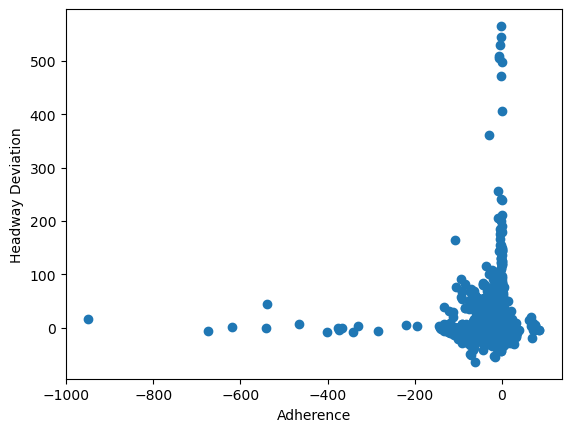

In [23]:
plt.scatter(wego_trim['adherence'],wego_trim['hdwy_dev']) #scatter plot of all adherence and headway dev data
plt.xlabel('Adherence')
plt.ylabel('Headway Deviation')
plt.show()

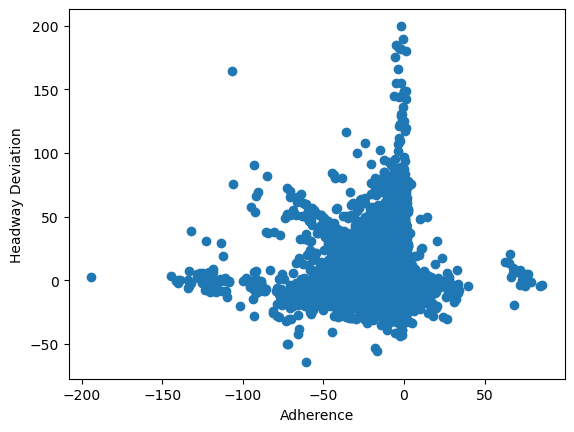

In [31]:
drop_outliers = wego_trim[(wego_trim['adherence'] > -200) & (wego_trim['hdwy_dev'] < 200)]
plt.scatter(drop_outliers['adherence'],drop_outliers['hdwy_dev'])
plt.xlabel('Adherence')
plt.ylabel('Headway Deviation')
plt.show()

In [33]:
wego_trim.corr(method='pearson')

,index,adherence,hdwy_dev
index,1.000000,-0.024963,0.006913
adherence,-0.024963,1.000000,-0.206794
hdwy_dev,0.006913,-0.206794,1.000000


In [35]:
drop_outliers.corr(method='pearson')

,index,adherence,hdwy_dev
index,1.000000,-0.030789,0.007215
adherence,-0.030789,1.000000,-0.270573
hdwy_dev,0.007215,-0.270573,1.000000


Lets look at a few trips with late adherence and see what happens to the headway. Afterwards look at trips with adherence between -6 and 1 and what happens to the headway.

In [64]:
unique_trip_id = wego['trip_id'].unique()
print(unique_trip_id)

[345104 345105 345106 ... 354069 354098 354106]


In [122]:
random_id = random.choice(unique_trip_id)
print(random_id)

345502


In [132]:
random_trip = wego[(wego['route_abbr'] == 22) 
 (wego['date'] == '2023-08-01') & 
(wego['time_point_abbr'] == 'MHSP') &
(wego['route_direction_name'] == 'TO DOWNTOWN')].sort_values(wego['scheduled_time'])
# random_trip = wego[(wego['route_abbr'] == 22)]
random_trip.head()

TypeError: 'Series' object is not callable